# 2. Text

Nothing tells a story like... text! Sometimes, it's the only available tool to tell a story. Multiplex provides visualizations that automatically organize text-only visualizations, allowing you to focus on annotating it.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import nltk
import os
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

In [2]:
paragraph = "Anthony Lopes is a Portuguese professional footballer who plays for \
Olympique Lyonnais as a goalkeeper. He came through the youth ranks at Lyon, being \
called to the first team in 2011 and making his debut the following year. \
He made over 300 appearances for the club, including the 2014 Coupe de la Ligue Final."

sentence = "Anthony Lopes is a Portuguese professional footballer."

As explained in [1. Getting started](1.%20Getting%20started.ipynb), all visualizations revolve around the Drawable class. The text annotation visualization is no exception, so first, we create a Drawable instance from a figure.

The text annotation visualization expects a list of tokens. Commonly, these are words or punctuation marks. Given just a list of tokens, the visualization lays them out as a sentence or as a paragraph.

The visualization uses the figure size to automatically segment the text into lines. You can align lines to the _left_ or _right_ or _justify_ them using the `align` argument.

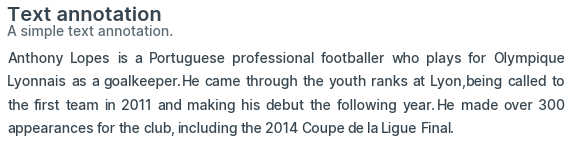

In [3]:
from multiplex import drawable
drawable = importlib.reload(drawable)

plt.style.use(os.path.join(sys.path[0], '..', 'styles', "fire.style"))

viz = drawable.Drawable(plt.figure(figsize=(10,10)))

tokens = nltk.word_tokenize(paragraph)
viz.draw_text_annotation(tokens, align='justify')

viz.set_title('Text annotation', loc='left')
viz.set_caption('A simple text annotation.')
plt.show()